In [37]:
import tensorflow as tf

In [38]:
fmnist = tf.keras.datasets.fashion_mnist

In [39]:
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

In [40]:
(X_train, y_train), (X_test, y_test) = fmnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [41]:
print('Test: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Test: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


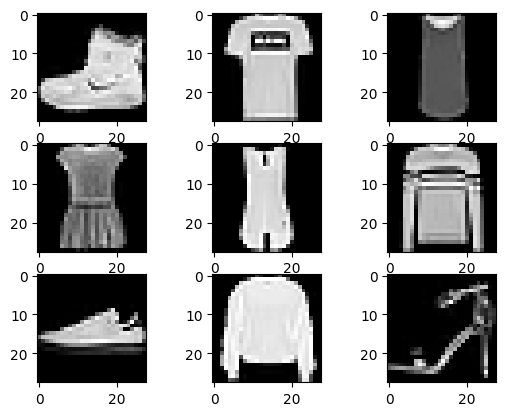

In [42]:
# plot first few images
import matplotlib.pyplot as plt
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap = plt.get_cmap('grey'))
plt.show()

In [43]:
X_train = X_train/255.0
X_test = X_test/255.0

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.sigmoid)
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\M-TT\miniconda3\envs\tf_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.fit(X_train, y_train, epochs=5)
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7820 - loss: 0.6300
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8633 - loss: 0.3833
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8776 - loss: 0.3374
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8810 - loss: 0.3168
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8897 - loss: 0.2984
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8765 - loss: 0.3526
Test Accuracy:  0.873199999332428


In [46]:
# Make the prediction with model
predictions = model.predict(X_test)
# print the shape the prediction of array
print(predictions.shape)
# print the first 10 predction
print(predictions[:10])
# convert the prediction to class labels
class_labels = [tf.argmax(prediction) for prediction in predictions]
print(class_labels[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)
[[2.00954764e-05 2.61039759e-07 3.62800989e-07 1.29510269e-07
  9.73105557e-07 6.61685457e-03 5.75326885e-06 2.27057219e-01
  9.93755675e-05 7.66198874e-01]
 [1.29171123e-04 4.38220589e-08 9.85693216e-01 1.52264150e-07
  3.15138977e-03 7.73626475e-12 1.10259829e-02 2.04315688e-12
  4.91423435e-08 9.94915192e-11]
 [4.94886717e-06 9.99994755e-01 7.99563651e-08 1.14285825e-07
  3.81686078e-08 6.67572670e-15 3.39919537e-10 2.06704014e-17
  6.75816594e-08 8.03845719e-14]
 [4.53240915e-07 9.99995232e-01 6.99375420e-08 4.16220155e-06
  1.52540949e-08 7.12080243e-13 8.03648370e-10 5.64139362e-17
  1.87157045e-09 2.71371467e-12]
 [2.31267825e-01 9.25685617e-06 3.35136652e-02 1.58634223e-03
  3.89049598e-03 3.07466507e-05 7.27711141e-01 7.96931545e-06
  1.98022928e-03 2.33391529e-06]
 [5.57381427e-04 9.99405265e-01 1.36352901e-05 1.00580910e-05
  9.38809899e-06 1.01092908e-12 2.32919547e-06 1.85076645e-13
  2.03277546e-06 9.26035776e-11]
 [2.8

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7825 - loss: 0.6388 - val_accuracy: 0.8606 - val_loss: 0.4004
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8598 - loss: 0.3851 - val_accuracy: 0.8718 - val_loss: 0.3509
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8742 - loss: 0.3400 - val_accuracy: 0.8814 - val_loss: 0.3336
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8839 - loss: 0.3165 - val_accuracy: 0.8822 - val_loss: 0.3261
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8905 - loss: 0.2980 - val_accuracy: 0.8848 - val_loss: 0.3190


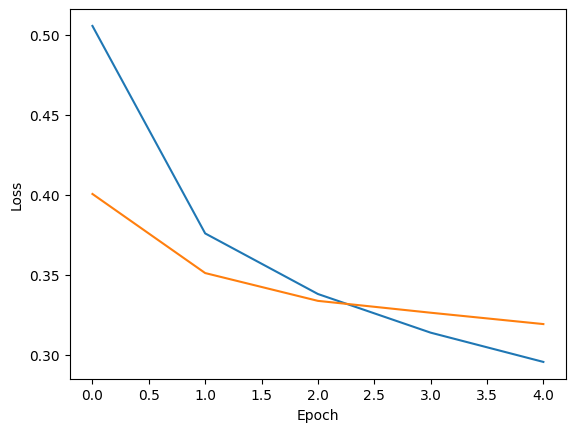

In [47]:
import tensorflow as tf
import matplotlib.pyplot as plt

fmnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fmnist.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

# split the training data into training and validation sets
X_val = X_train[:5000]
y_val = y_train[:5000]
X_train = X_train[5000:]
y_train = y_train[5000:]
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


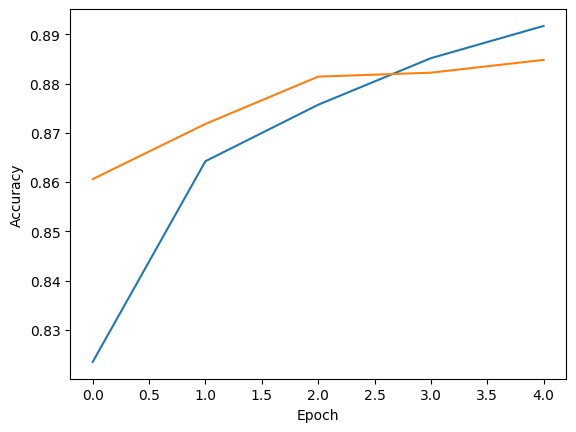

In [48]:
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,),


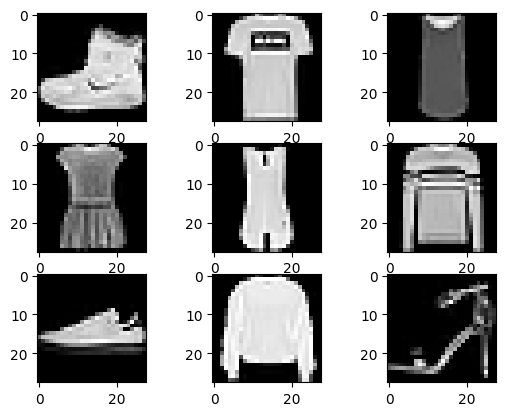

c:\Users\M-TT\miniconda3\envs\tf_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7888 - loss: 0.5918
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8652 - loss: 0.3682
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8798 - loss: 0.3248
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8898 - loss: 0.2968
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8979 - loss: 0.2768
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8819 - loss: 0.3303
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[2.45621432e-05 1.03704643e-07 1.10186716e-06 1.34635528e-07
  9.67375399e-07 1.22735789e-02 5.58135253e-06 7.22994283e-02
  3.05409543e-07 9.15394247e-01]
 [1.20755263e-04 3.00620943e-12 9.98358190e-01 3.55106309e-08
  7.82381045e-04 4.16322791e-07 7.38156552e-04 4.25971897e-10
  2.28295534e-08 4.18400904e-11]
 [1.79934401e-10 1.00000000e+00 5.35958742e-14 5.58097180e-10
  3.66667113e-11 4.22321495e-17 7.77840917e-11 6.82366516e-19
  1.5834

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fmnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fmnist.load_data()

assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s,' % (X_test.shape, y_test.shape))

for i in range(9):
    plt.subplot(330 + 1 + i)
    
    plt.imshow(X_train[i], cmap = plt.get_cmap('grey'))
plt.show()
X_train = X_train/255.0
X_test = X_test/255.0
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)
predictions = model.predict(X_test)
print(predictions[:10])
print(predictions.shape)
class_labels = [tf.argmax(predictions) for prediction in predictions]
print(class_labels[:10])

Epoch 1/5


c:\Users\M-TT\miniconda3\envs\tf_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.6271 - loss: 1.1155 - val_accuracy: 0.7510 - val_loss: 0.6735
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8061 - loss: 0.5705 - val_accuracy: 0.8133 - val_loss: 0.5350
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.8391 - loss: 0.4817 - val_accuracy: 0.8172 - val_loss: 0.5173
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8530 - loss: 0.4427 - val_accuracy: 0.8152 - val_loss: 0.5291
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.8610 - loss: 0.4111 - val_accuracy: 0.8419 - val_loss: 0.4600


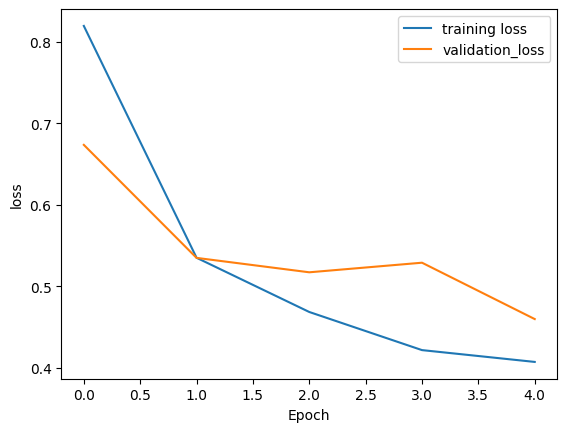

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt

fmnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fmnist.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

X_val = X_train[5000:]
y_val = y_train[5000:]
X_train = X_train[:5000]
y_train = y_train[:5000]

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()



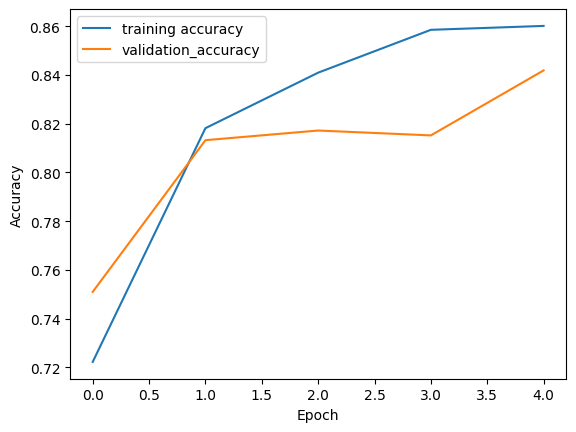

In [12]:
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()